# Resolviendo un problema de clasificación multiple

Este problema en esencia es MUY similar al problema anterior, simplemente vamos a explicar en qué consiste este nuevo problema de clasificación y solamente voy a poner los puntos diferenciadores respecto al caso de estudio anterior.

En esta ocasión el problema consiste en entrenar a un modelo de deep learning que sea capaz de diferenciar entre 46 tópicos diferentes relacionados con temas de noticias. Para ello vamos a utilizar el dataset Reuters.

Este dataset cuenta con propiedades similares al dataset anterior, también está representado como label encoding y por ende utilizaremos las mismas técnicas de preprocesamiento de datos para transformarlo en one hot encoding. Sin embargo, el hecho de que la clasificación sea multiple, genera un par de diferencias importantes respecto a la clasificación binaria. Veamos los pasos a continuación.



In [195]:
import numpy as np
from keras import layers, models, regularizers
from keras.datasets import reuters
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Cargando Dataset

In [196]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [197]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [198]:
def convert_number_to_word(example):
  word_index = reuters.get_word_index()
  word_index = dict([(value, key) for (key, value) in word_index.items()])
  print(' '.join([word_index.get(i - 3, 'None') for i in example]))

In [199]:
convert_number_to_word(train_data[0])

None None None said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## Normalizando Datos

In [200]:
def one_hot_encoding(sequences, dim=10_000):
    results = np.zeros((len(sequences), dim))

    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results


x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

# Observamos como luce una etiqueta de y_train
print(train_labels[0], train_labels[0].shape)

# Debemos transformar esta salida en una salida de Clasificación multiple, esto es lo mismo que hicimos en el problema de la clasificación de numeros escritos a mano del dataset MNIST
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train[0], y_train[0].shape)

3 ()
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (46,)


Definiendo la Arquitectura de nuestra red

In [201]:
def architecture(model: models.Sequential, input_shape: tuple, n_classes: int) -> models.Sequential:
    model.add(layers.Dense(128, activation="relu", input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
    # model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    # model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    # IMPORTANTE: Ahora que nuestro problema es de clasificación MULTIPLE nuestra activación de la capa de predicción
    # Es diferente, en este caso usamos softmax, porque nos interesa tener la probabilidad de cada clase a la salida.
    model.add(layers.Dense(n_classes, activation="softmax"))
    return model


model_norm = models.Sequential()
model_norm = architecture(model=model_norm, input_shape=(10000, ), n_classes=46)

## Entrenamiento del modelo de clasificación multiple

Compilando la red

In [202]:
# Dado que nuestro problema tiene varias clases, entonces usaremos "categorical_crossentropy"
# en lugar de "binary_crossentropy"
model_norm.compile(optimizer="adam", loss="categorical_crossentropy", metrics="acc")

Entrenando la red

In [203]:
history_norm = model_norm.fit(x_train, y_train, epochs=15, batch_size=512, validation_split=0.3)

Epoch 1/15
13/13 [==============================] - 1s 36ms/step - loss: 3.6215 - acc: 0.3884 - val_loss: 2.6419 - val_acc: 0.5451
Epoch 2/15
13/13 [==============================] - 0s 18ms/step - loss: 2.3163 - acc: 0.5554 - val_loss: 1.8354 - val_acc: 0.6631
Epoch 3/15
13/13 [==============================] - 0s 16ms/step - loss: 1.7587 - acc: 0.6531 - val_loss: 1.5815 - val_acc: 0.6976
Epoch 4/15
13/13 [==============================] - 0s 18ms/step - loss: 1.4852 - acc: 0.7123 - val_loss: 1.4295 - val_acc: 0.7358
Epoch 5/15
13/13 [==============================] - 0s 19ms/step - loss: 1.2870 - acc: 0.7633 - val_loss: 1.3349 - val_acc: 0.7647
Epoch 6/15
13/13 [==============================] - 0s 17ms/step - loss: 1.1348 - acc: 0.7975 - val_loss: 1.2784 - val_acc: 0.7714
Epoch 7/15
13/13 [==============================] - 0s 17ms/step - loss: 1.0108 - acc: 0.8265 - val_loss: 1.2414 - val_acc: 0.7900
Epoch 8/15
13/13 [==============================] - 0s 17ms/step - loss: 0.9257 - a

Análisis de resultados:

71/71 [==============================] - 0s 1ms/step - loss: 1.2356 - acc: 0.7947
[1.2356271743774414, 0.7947462201118469]


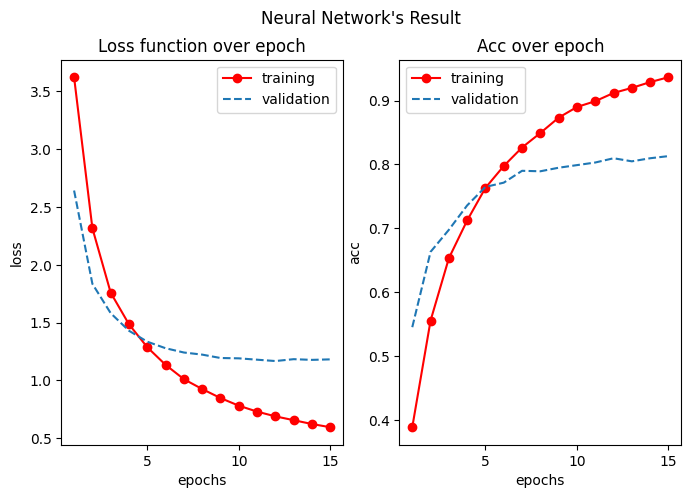

In [204]:
results = model_norm.evaluate(x_test, y_test)
print(results)
history_dict = history_norm.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]
epoch = range(1, len(loss_values) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle("Neural Network's Result")
ax1.set_title("Loss function over epoch")
ax2.set_title("Acc over epoch")
ax1.set(ylabel="loss", xlabel="epochs")
ax2.set(ylabel="acc", xlabel="epochs")
ax1.plot(epoch, loss_values, 'o-r', label='training')
ax1.plot(epoch, val_loss_values, '--', label='validation')
ax2.plot(epoch, acc_values, 'o-r', label='training')
ax2.plot(epoch, val_acc_values, '--', label='validation')
ax1.legend()
ax2.legend()
plt.show()

In [205]:
predictions = model_norm.predict(x_test)
predictions[0]

71/71 [==============================] - 0s 1ms/step


array([3.1051215e-05, 4.9045728e-05, 1.3142420e-05, 9.1872305e-01,
       7.6804213e-02, 2.0340135e-06, 2.1431028e-05, 2.4294683e-05,
       1.0761585e-03, 9.9123579e-05, 2.7071110e-05, 8.1035272e-05,
       3.8019607e-05, 2.9395251e-05, 4.7182580e-06, 1.4607252e-05,
       8.9857978e-04, 1.8669814e-05, 2.1482676e-05, 2.3716321e-04,
       2.3715460e-04, 6.5255468e-04, 3.0270953e-06, 6.6106462e-05,
       5.4826423e-06, 2.1236021e-05, 1.5618936e-05, 1.5192744e-05,
       8.5184656e-06, 3.2670468e-05, 4.6235167e-05, 3.1022919e-05,
       7.9004949e-06, 5.2579835e-06, 1.3037030e-04, 3.1045915e-05,
       1.8234485e-04, 1.2727622e-04, 2.0346586e-05, 6.6956221e-05,
       8.0870332e-06, 7.1456211e-06, 1.1010948e-05, 5.2728724e-06,
       2.0535099e-06, 4.5922283e-05], dtype=float32)

In [206]:
np.sum(predictions[0])

1.0000001

In [207]:
np.argmax(predictions[0])

3